# DS Automation Assignment

Lacey Martin

Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\laceym\OneDrive - Regis University\MSDS600\cleaned_churn_data.csv", index_col='customerID')
df
df.head(10)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,charge_per_tenure
customerID,,,,,,,,
7590-VHVEG,1.0,0,0,3,29.85,29.85,0,29.850000
5575-GNVDE,34.0,1,1,2,56.95,1889.50,0,55.573529
3668-QPYBK,2.0,1,0,2,53.85,108.15,1,54.075000
7795-CFOCW,45.0,0,1,1,42.30,1840.75,0,40.905556
9237-HQITU,2.0,1,0,3,70.70,151.65,1,75.825000
9305-CDSKC,8.0,1,0,3,99.65,820.50,1,102.562500
1452-KIOVK,22.0,1,0,0,89.10,1949.40,0,88.609091
6713-OKOMC,10.0,0,0,2,29.75,301.90,0,30.190000
7892-POOKP,28.0,1,0,3,104.80,3046.05,1,108.787500


In [4]:
!jupyter kernelspec list

Available kernels:
  py310      C:\Users\laceym\AppData\Roaming\jupyter\kernels\py310
  python3    C:\Users\laceym\anaconda3\share\jupyter\kernels\python3


0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tenure             7043 non-null   float64
 1   PhoneService       7043 non-null   int64  
 2   Contract           7043 non-null   int64  
 3   PaymentMethod      7043 non-null   int64  
 4   MonthlyCharges     7043 non-null   float64
 5   TotalCharges       7043 non-null   float64
 6   Churn              7043 non-null   int64  
 7   charge_per_tenure  7043 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 495.2+ KB


In [6]:
from pycaret.classification import ClassificationExperiment #setup, compare_models, predict_model, save_model, load_model

In [7]:
automl = ClassificationExperiment() #setup(df, target='Churn')

In [8]:
automl.setup(df, target='Churn')

,Description,Value
0,Session id,2647
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7043, 8)"
4,Transformed data shape,"(7043, 8)"
5,Transformed train set shape,"(4930, 8)"
6,Transformed test set shape,"(2113, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [9]:
automl

In [10]:
best_model = automl.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7909,0.8298,0.5137,0.6306,0.5657,0.4299,0.4341,0.8000
ridge,Ridge Classifier,0.7878,0.0000,0.4380,0.6493,0.5225,0.3928,0.4057,0.0320
lda,Linear Discriminant Analysis,0.7870,0.8167,0.4870,0.6288,0.5478,0.4116,0.4180,0.0260
ada,Ada Boost Classifier,0.7854,0.8293,0.4679,0.6313,0.5360,0.4006,0.4090,0.2870
gbc,Gradient Boosting Classifier,0.7844,0.8294,0.4579,0.6281,0.5292,0.3940,0.4025,0.7620
lightgbm,Light Gradient Boosting Machine,0.7779,0.8122,0.4862,0.6017,0.5365,0.3929,0.3975,0.4930
knn,K Neighbors Classifier,0.7684,0.7442,0.4389,0.5842,0.5006,0.3540,0.3604,0.8490
rf,Random Forest Classifier,0.7641,0.7971,0.4534,0.5701,0.5043,0.3524,0.3568,0.5720
et,Extra Trees Classifier,0.7550,0.7709,0.4595,0.5460,0.4987,0.3382,0.3406,0.3130
qda,Quadratic Discriminant Analysis,0.7414,0.8128,0.7125,0.5099,0.5941,0.4121,0.4248,0.0180


In [11]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2647, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

I used auto ml to compare the models which showed logistic regression is the most accurate and then used best_model to use logistric regression moving forward. 

In [12]:
automl.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

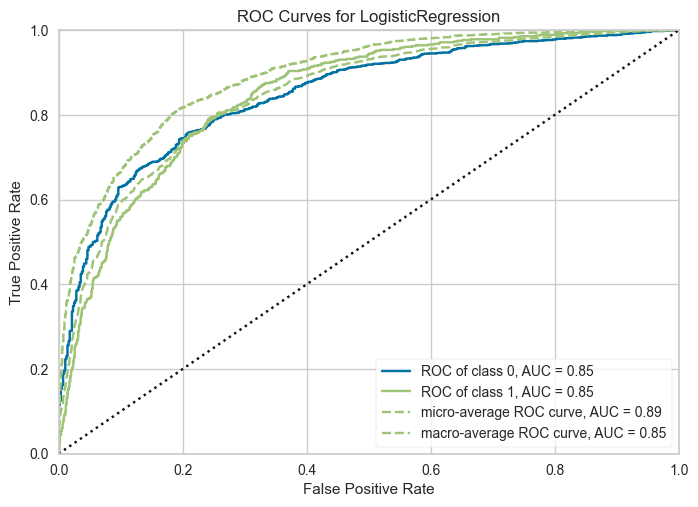

In [13]:
automl.plot_model(best_model)

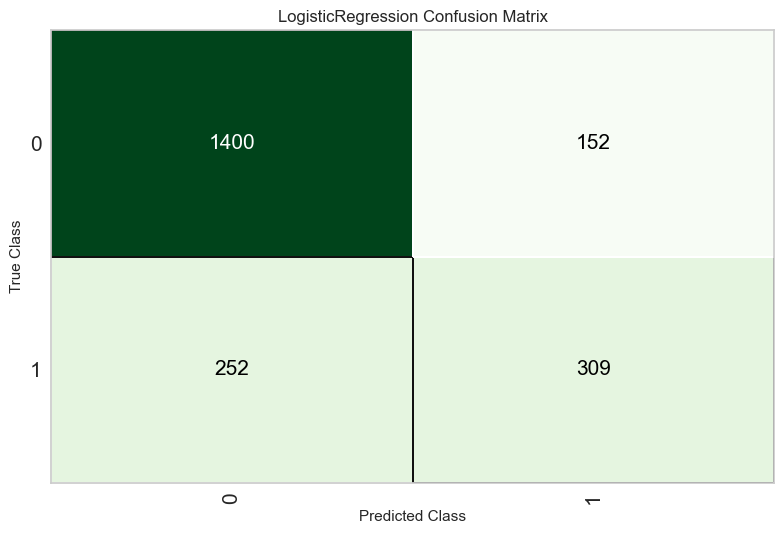

In [15]:
automl.plot_model(best_model, plot = 'confusion_matrix')

In [16]:
df.iloc[-2:-1].shape

(1, 8)

In [17]:
automl.predict_model(best_model, df.iloc[-2:-1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,0,1.0000,1.0000,1.0000,nan,0.0000


,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,charge_per_tenure,Churn,prediction_label,prediction_score
customerID,,,,,,,,,,
8361-LTMKD,4.0,1,0,2,74.400002,306.600006,76.650002,1,1,0.5707


In [18]:
predictions = automl.predict_model(best_model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7968,0.8361,0.5249,0.6437,0.5782,0.4462,0.4503


In [19]:
predictions.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,charge_per_tenure,Churn,prediction_label,prediction_score
customerID,,,,,,,,,,
7590-VHVEG,1.0,0,0,3,29.850000,29.850000,29.850000,0,1,0.5858
5575-GNVDE,34.0,1,1,2,56.950001,1889.500000,55.573528,0,0,0.9218
3668-QPYBK,2.0,1,0,2,53.849998,108.150002,54.075001,1,0,0.5531
7795-CFOCW,45.0,0,1,1,42.299999,1840.750000,40.905556,0,0,0.9323
9237-HQITU,2.0,1,0,3,70.699997,151.649994,75.824997,1,1,0.5985


In [20]:
automl.save_model(best_model, 'pycaret_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'PhoneService',
                                              'Contract', 'PaymentMethod',
                                              'MonthlyCharges', 'TotalCharges',
                                              'charge_per_tenure'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbos...
           

In [21]:
new_pycaret = ClassificationExperiment()
loaded_model = new_pycaret.load_model('pycaret_model')

Transformation Pipeline and Model Successfully Loaded


In [23]:
new_pycaret.predict_model(loaded_model, df.iloc[-2:-1])

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,charge_per_tenure,Churn,prediction_label,prediction_score
customerID,,,,,,,,,,
8361-LTMKD,4.0,1,0,2,74.400002,306.600006,76.650002,1,1,0.5707


Same prediction as before. 

In [31]:
from IPython.display import Code

# Summary

Write a short summary of the process and results here.

First, I installed Pycaret and imported the dataset. I imported the pycaret classification experiment setting the target to churn. Next, I used auto ml to compare and identify the best model, which showed me that the logistic regression model has the best accuracy. Also, I used a confusion matrix to evaluate the model. I think it shows it would be a good model to evaluate churn. In reviewing the confusion matrix, if the false negatives were greater than the true positives then I would re-evaluate the model. I think with looking at churn I'm not as concerned with the false positives I don't think it would cause any harm by using the efforts to mitigate churn such as offering discounts. I used Pycaret’s prediction function to look at which were misclassified however I did not notice any similarities between them. I saved the model, loaded it, and tested the model. In testing, it performed the same way as it did initially. 